# Pymaceuticals Inc.
---

### Analysis

- A correlation coefficient of 0.8419 is quite close to 1, which suggests a strong positive linear relationship between mouse weight and tumor volume. In other words, as the mouse weight increases, the average observed tumor volume tends to increase.

This positive correlation implies that there is a clear trend where heavier mice tend to have larger average tumor volumes when treated with the Capomulin regimen.

The strong positive correlation is further supported by the scatter plot and the regression line, where you can see a clear upward trend in the data points, and the regression line fits the data well.

In summary, the analysis suggests that as mouse weight increases, the average tumor volume tends to increase, indicating a strong positive correlation between these two variables for mice treated with the Capomulin regimen.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice.
num_unique_mice = combined_data["Mouse ID"].nunique()
num_unique_mice

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [12]:
# Checking the number of mice in the clean DataFrame.
unique_mice_cleaned = cleaned_data["Mouse ID"].nunique()
unique_mice_cleaned

249

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_grouped = cleaned_data.groupby("Drug Regimen")

summary_statistics = regimen_grouped["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Deviation',
    'sem': 'Tumor Volume SEM'
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
adv_summary_statistics = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

adv_summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

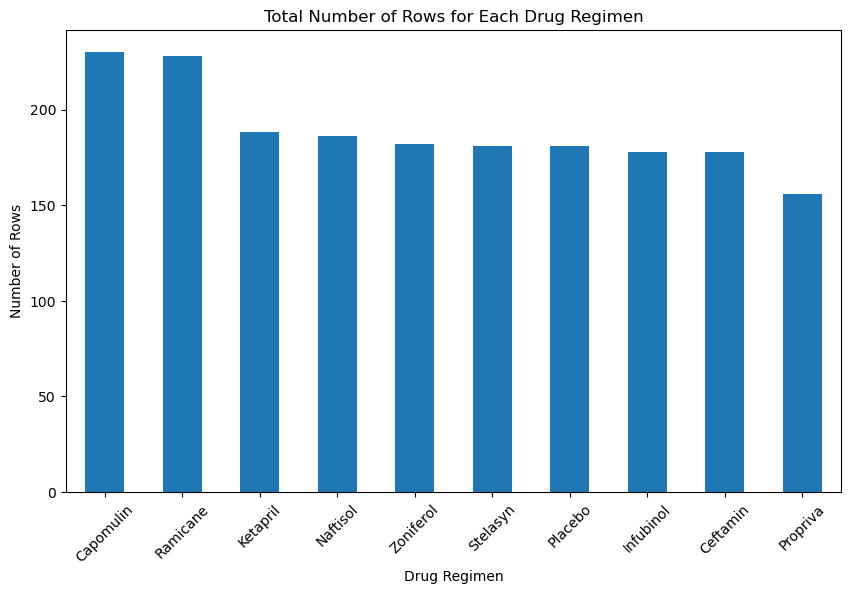

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()


regimen_counts.plot(kind='bar', figsize=(10, 6), title='Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)


plt.show()


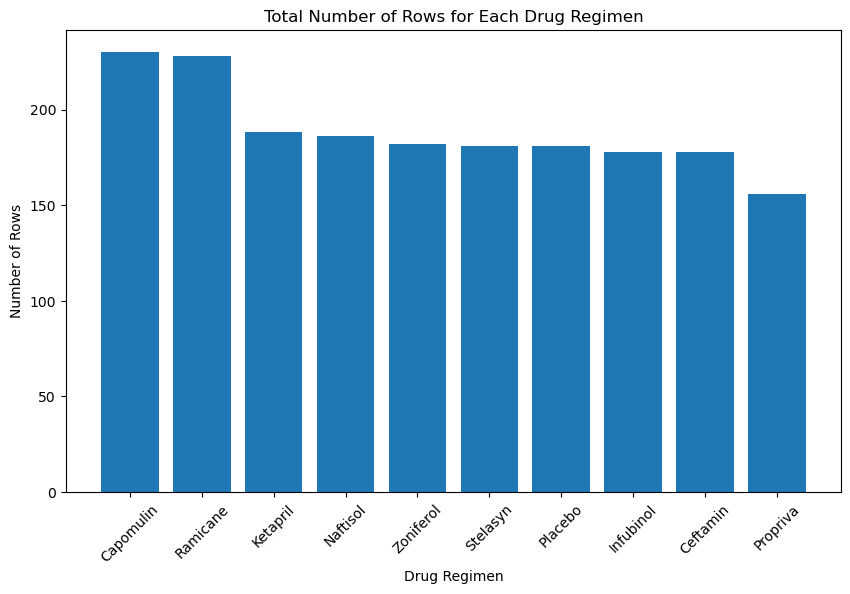

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)


plt.show()

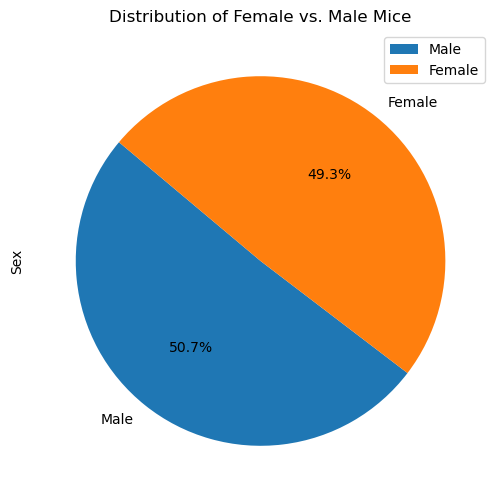

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_data['Sex'].value_counts()


gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6, 6), title='Distribution of Female vs. Male Mice')

plt.legend()
plt.show()

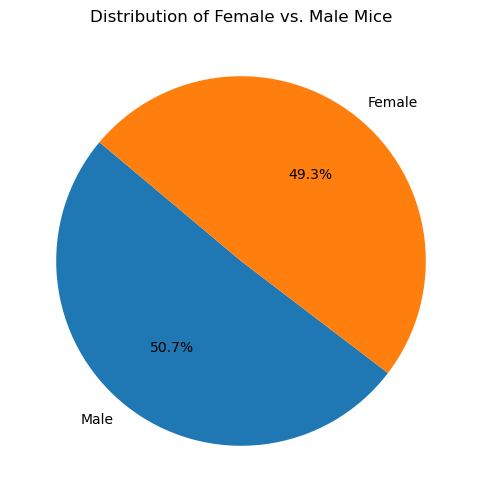

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = cleaned_data['Sex'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Female vs. Male Mice')


plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


target_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the data for the specified treatment regimens
target_data = cleaned_data[cleaned_data["Drug Regimen"].isin(target_regimens)]

last_timepoints = target_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, target_data, on=["Mouse ID", "Timepoint"], how="inner")

# Display the final tumor volume data
print(final_tumor_volume)

   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female          20          23  
1

In [26]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Create an empty list to store potential outliers
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == regimen]
    tumor_volume = regimen_data["Tumor Volume (mm3)"]
    
    # Add the tumor volume data to the list for potential plotting
    tumor_volume_data.append(tumor_volume)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine upper and lower bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers and add to the outliers list
    potential_outliers = regimen_data[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    if not potential_outliers.empty:
        outliers.append((regimen, potential_outliers))

# Display potential outliers
for regimen, potential_outliers in outliers:
    print(f"Potential outliers for {regimen}:")
    print(potential_outliers)


Potential outliers for Infubinol:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
15     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
15  Female          18          25  


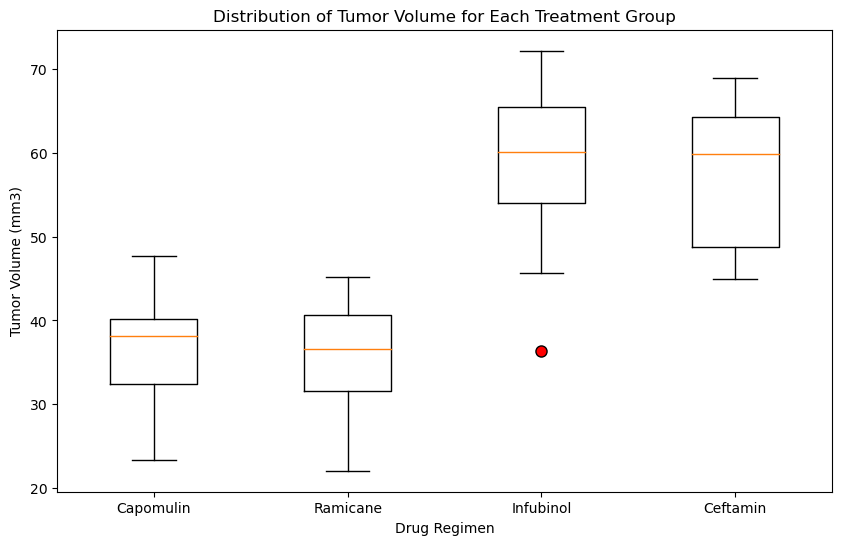

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data = [
    final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"],
    final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"],
    final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"],
    final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
]

# Create labels for the box plot
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=labels, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the box plot
plt.show()

## Line and Scatter Plots

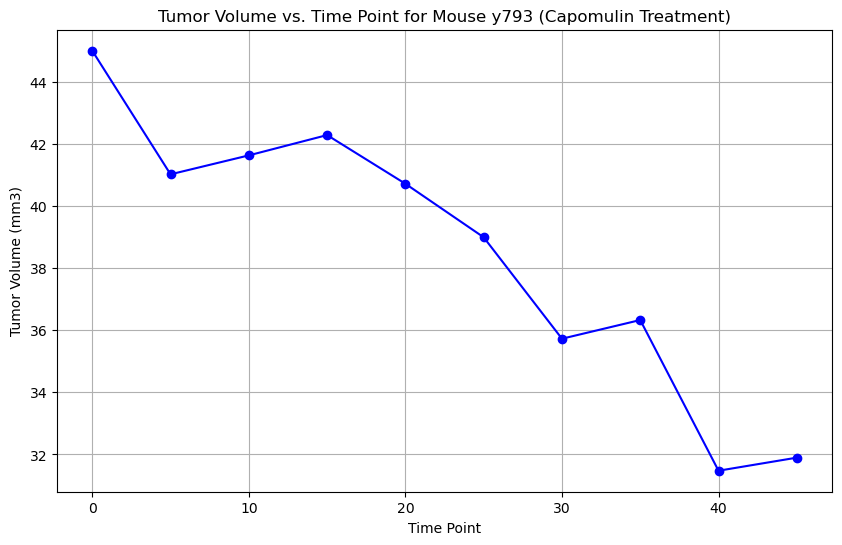

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Specify the mouse ID
selected_mouse_id = 'y793'

# Filter the data for the selected mouse treated with Capomulin
selected_mouse_data = cleaned_data[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] == selected_mouse_id)]

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker='o', linestyle='-', color='b')
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin Treatment)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

# Show the line plot
plt.show()

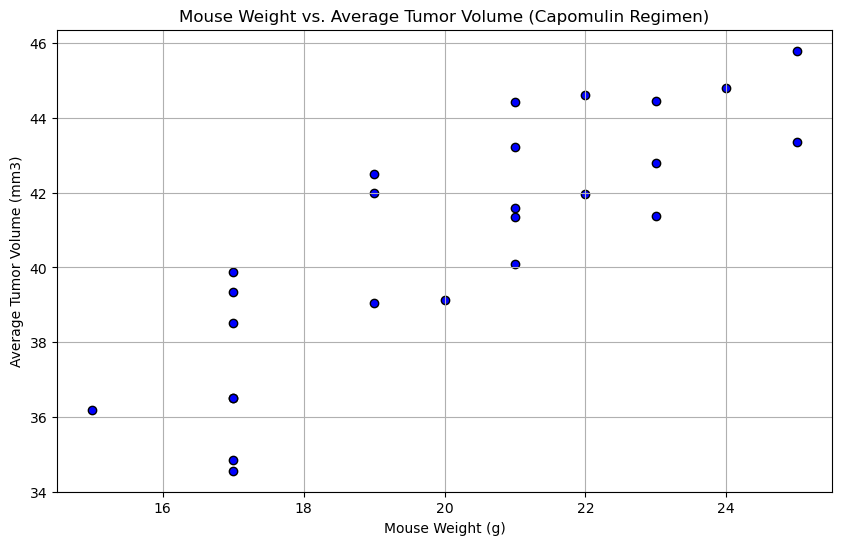

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Group the data by "Mouse ID" and calculate the average tumor volume and mouse weight
average_data = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()

# Create a scatter plot for mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"], marker="o", facecolors="b", edgecolors="black")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

# Show the scatter plot
plt.show()


## Correlation and Regression

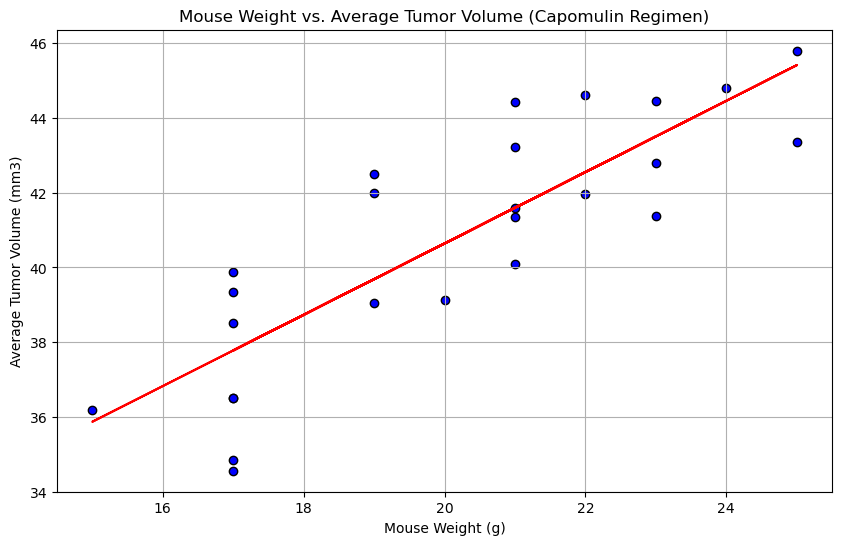

Correlation Coefficient: 0.8419363424694722


In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Group the data by "Mouse ID" and calculate the average tumor volume and mouse weight
average_data = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = average_data["Weight (g)"].corr(average_data["Tumor Volume (mm3)"])

# Create a scatter plot for mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"], marker="o", facecolors="b", edgecolors="black")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate the linear regression model
(slope, intercept, r_value, p_value, std_err) = linregress(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"])
regress_values = average_data["Weight (g)"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Add the regression line to the plot
plt.plot(average_data["Weight (g)"], regress_values, "r-")
plt.grid(True)

# regression line
plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")
